In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.svm import SVC
%matplotlib inline 
import plotly.express as px
from sklearn.metrics import confusion_matrix,classification_report
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
loan_data = pd.read_csv('/content/gdrive/MyDrive/MACHINE LEARNING ALGORITHM 1/15-Decision-Trees-and-Random-Forests/loan_data.csv')

In [4]:
loan_data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

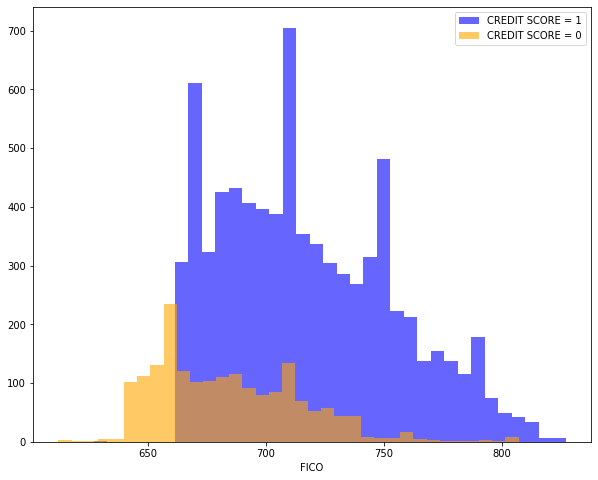

In [12]:
plt.figure(figsize = (10,8))
plt.hist(loan_data[loan_data['credit.policy']==1]['fico'],bins=35,color='blue',label='CREDIT SCORE = 1',alpha=0.6)
plt.hist(loan_data[loan_data['credit.policy']==0]['fico'],bins=35,color='orange',label='CREDIT SCORE = 0',alpha=0.6)
plt.xlabel('FICO')
plt.legend()
plt.show()

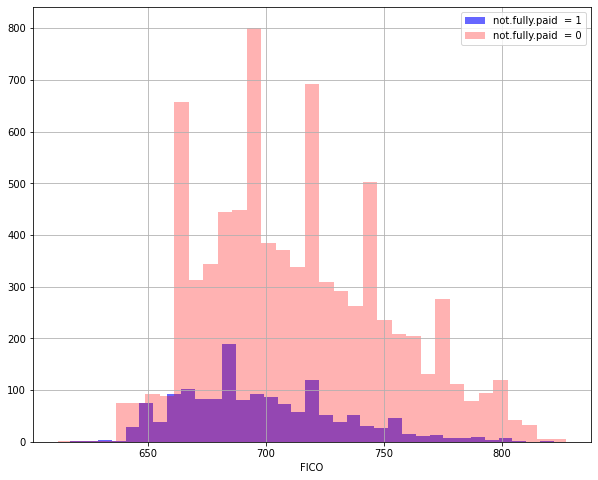

In [21]:
plt.figure(figsize = (10,8))
loan_data[loan_data['not.fully.paid']==1]['fico'].hist(bins=35,color='blue',label='not.fully.paid  = 1',alpha=0.6)
loan_data[loan_data['not.fully.paid']==0]['fico'].hist(bins=35,color='red',label='not.fully.paid  = 0',alpha=0.3)
plt.xlabel('FICO')
plt.legend()
plt.show()

<function matplotlib.pyplot.show>

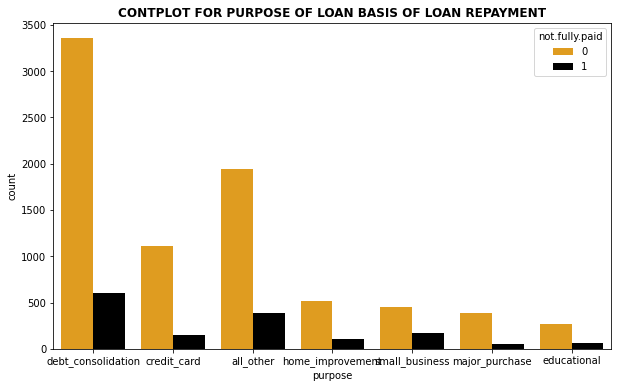

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='credit.polic',data=loan_data,palette=['orange','black'])
plt.title('CONTPLOT FOR PURPOSE OF LOAN BASIS OF LOAN REPAYMENT',fontweight='bold')
plt.show

No handles with labels found to put in legend.


<Figure size 720x576 with 0 Axes>

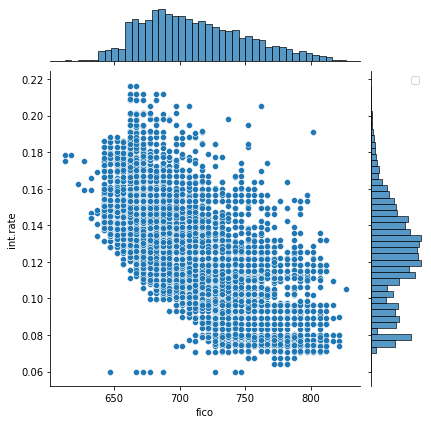

In [33]:
plt.figure(figsize =(10,8))
sns.jointplot(x='fico',y='int.rate',data=loan_data)
plt.xlabel('FICO')
plt.ylabel('INTEREST RATE')
plt.legend()
plt.show()

<Figure size 720x576 with 0 Axes>

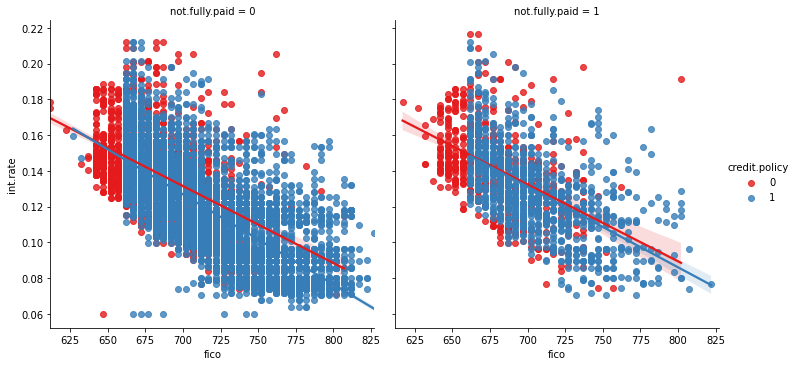

In [39]:
plt.figure(figsize=(10,8))
sns.lmplot(x='fico',y='int.rate',data = loan_data,hue='credit.policy',col='not.fully.paid',palette='Set1')

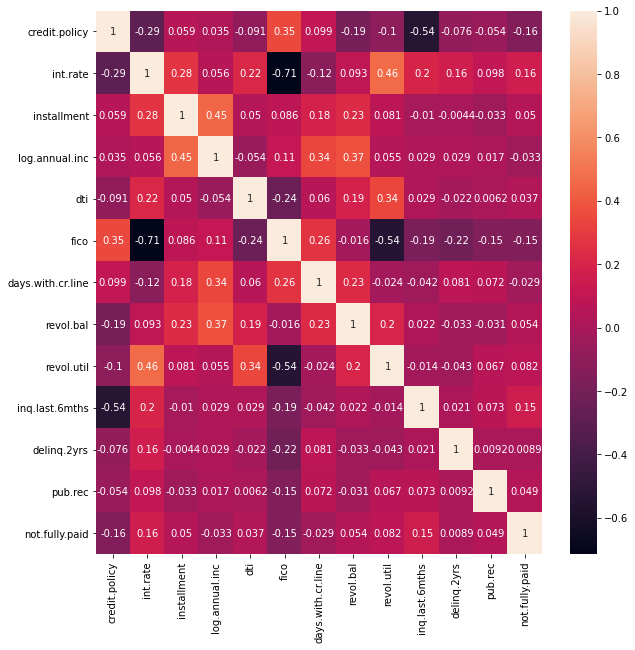

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)

<Figure size 792x648 with 0 Axes>

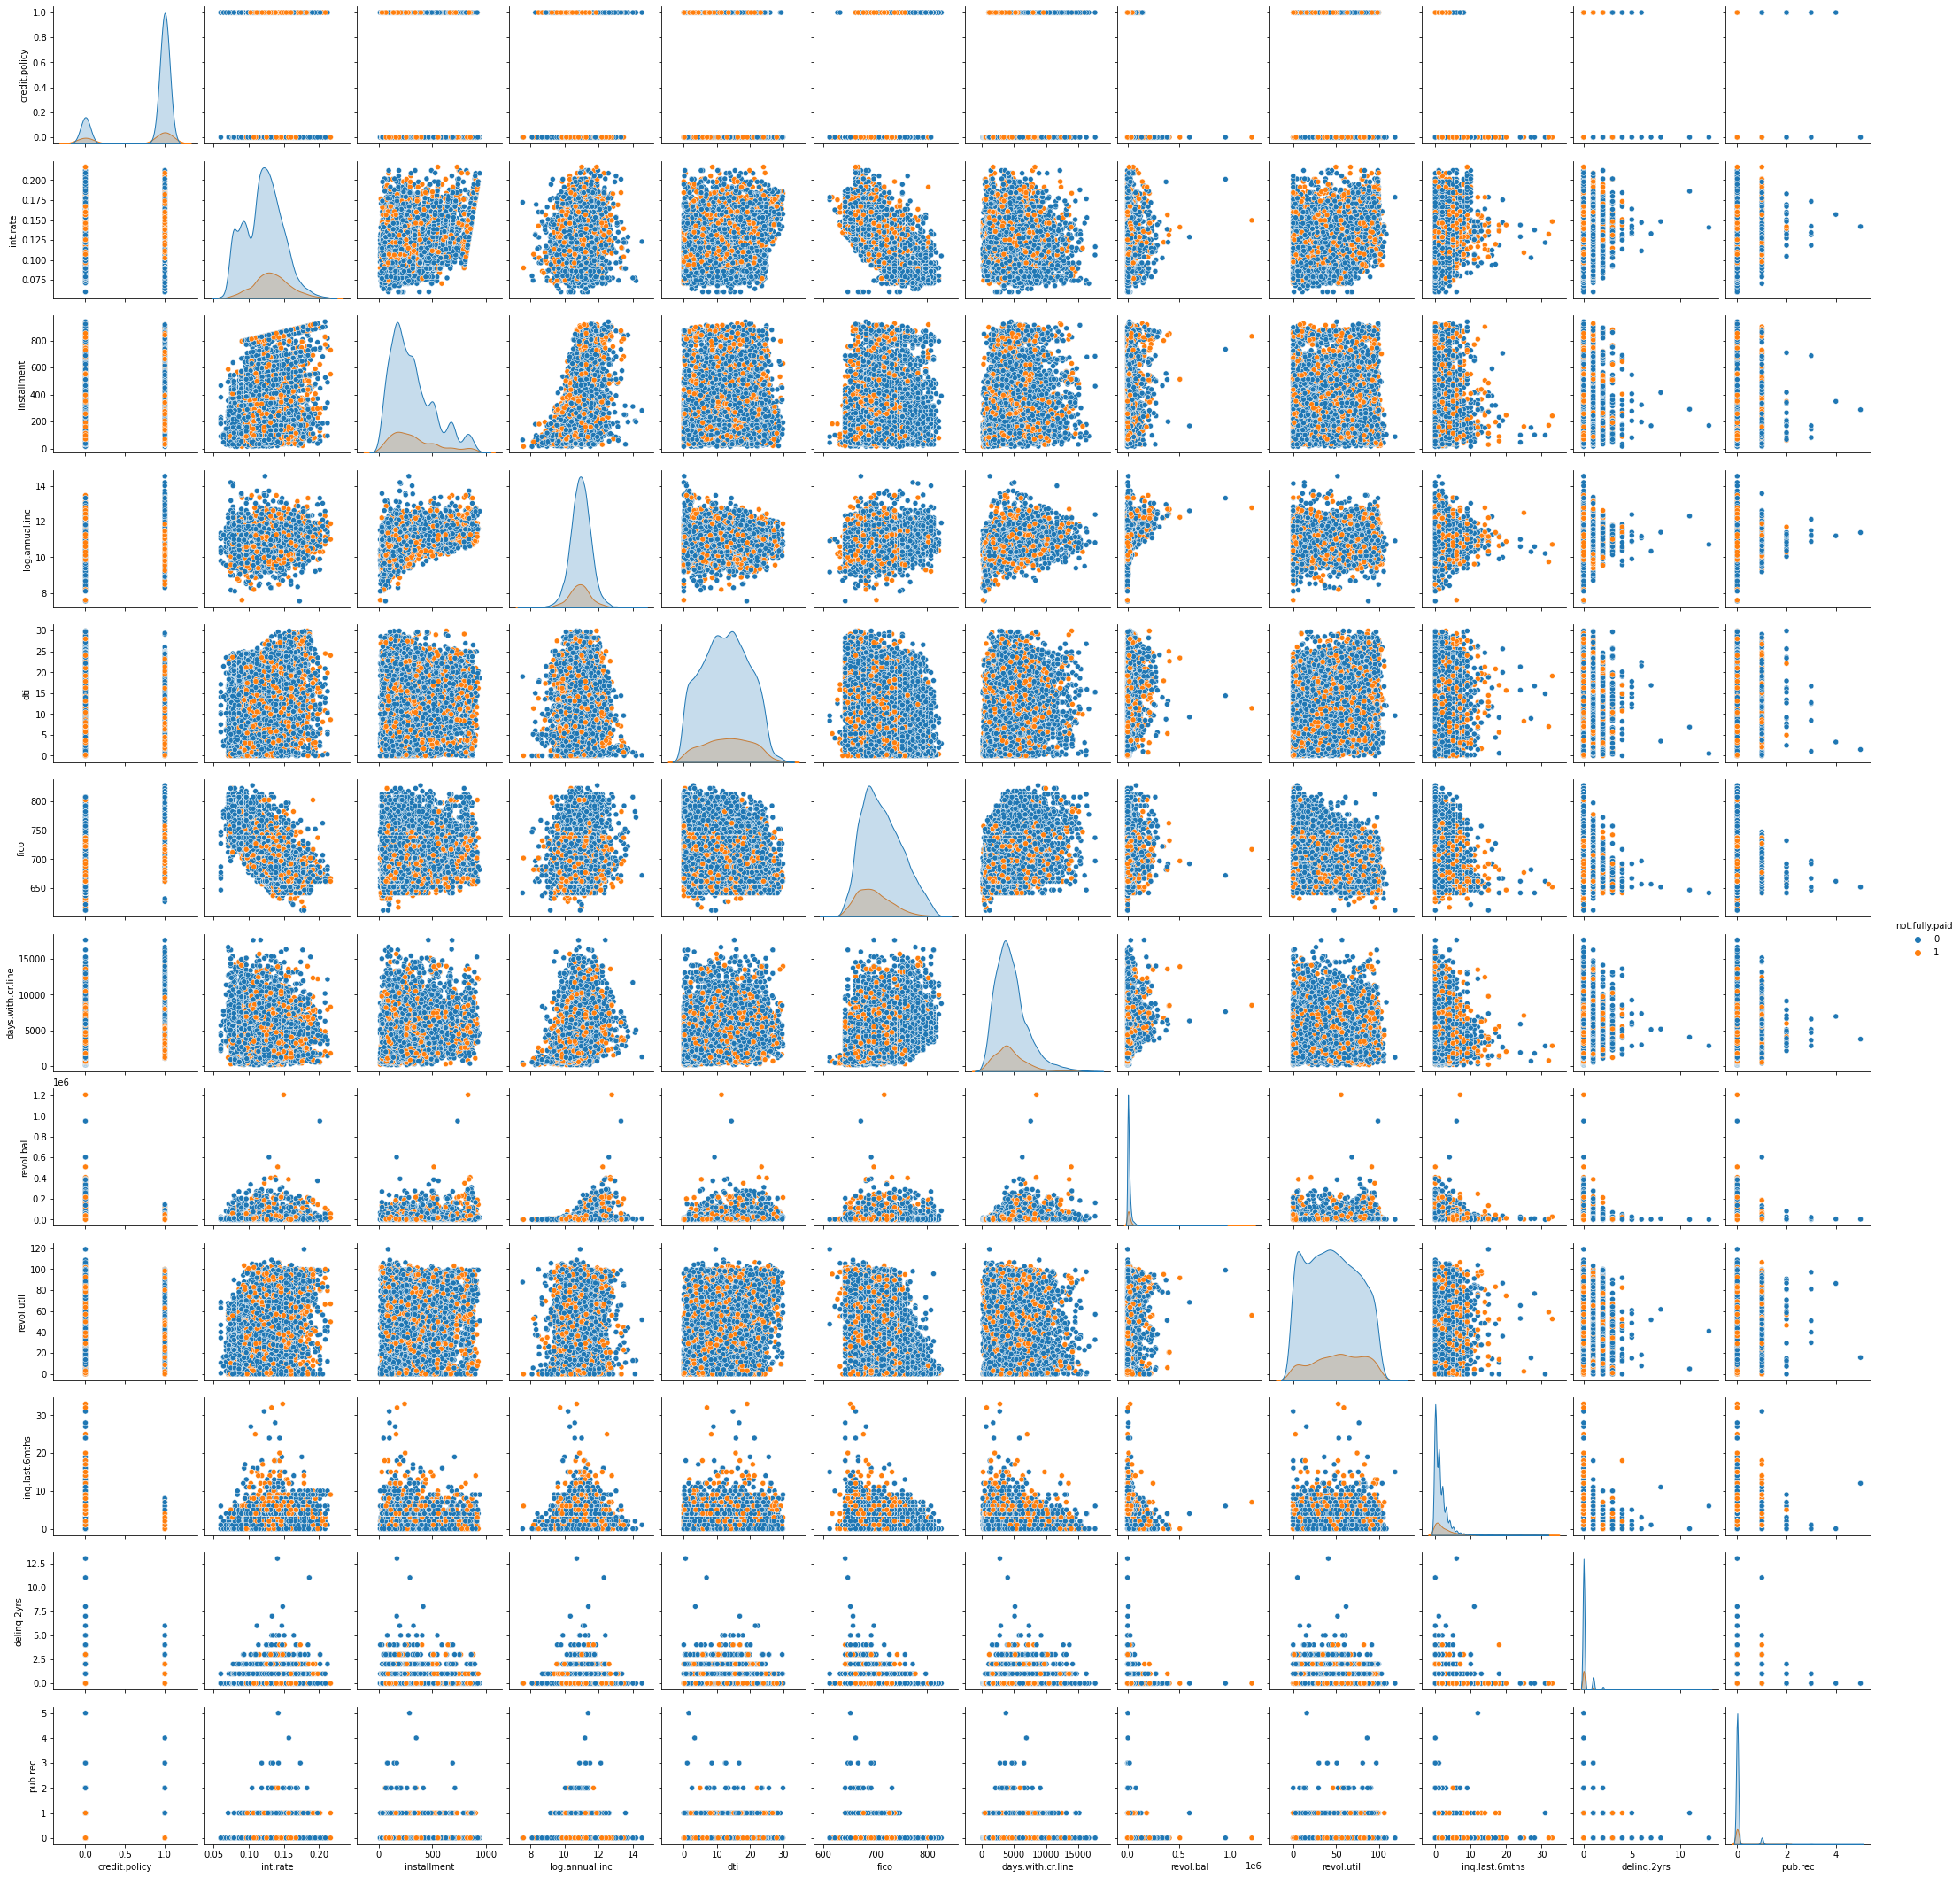

In [45]:
plt.figure(figsize=(11,9))
sns.pairplot(loan_data,hue='not.fully.paid')
plt.show()

In [46]:
refined_data = pd.get_dummies(loan_data,columns=['purpose'],drop_first=True)

In [55]:
x = refined_data.drop(['not.fully.paid'],axis=1)
y = refined_data['not.fully.paid']

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

**DECISION TREE MODEL**

In [66]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
prediction_dt = dtree.predict(x_test)

CLASSIFICATION REPORT FOR DECISION TREE :
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      3237
           1       0.21      0.24      0.22       595

    accuracy                           0.74      3832
   macro avg       0.53      0.54      0.53      3832
weighted avg       0.76      0.74      0.75      3832



ACCURACY SCORE : 0.7372129436325678





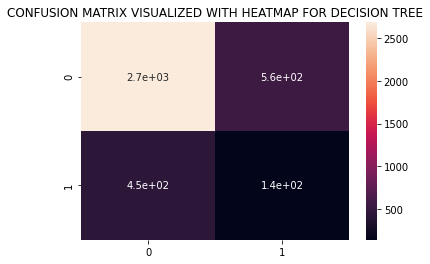

In [67]:
print('CLASSIFICATION REPORT FOR DECISION TREE :\n{}\n\n'.format(classification_report(y_test,prediction_dt)))
print('ACCURACY SCORE : {}\n\n\n'.format(accuracy_score(y_test,prediction_dt)))
sns.heatmap(confusion_matrix(y_test,prediction_dt),annot=True)
plt.title('CONFUSION MATRIX VISUALIZED WITH HEATMAP FOR DECISION TREE')
plt.show()

**RANDOM FOREST MODEL**

In [79]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
prediction_rf = rf.predict(x_test)

CLASSIFICATION REPORT FOR RANDOM FOREST :
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3237
           1       0.51      0.03      0.06       595

    accuracy                           0.84      3832
   macro avg       0.68      0.51      0.49      3832
weighted avg       0.80      0.84      0.78      3832



ACCURACY SCORE : 0.8449895615866388





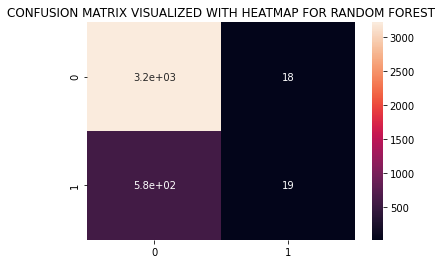

In [80]:
print('CLASSIFICATION REPORT FOR RANDOM FOREST :\n{}\n\n'.format(classification_report(y_test,prediction_rf)))
print('ACCURACY SCORE : {}\n\n\n'.format(accuracy_score(y_test,prediction_rf)))
sns.heatmap(confusion_matrix(y_test,prediction_rf),annot=True)
plt.title('CONFUSION MATRIX VISUALIZED WITH HEATMAP FOR RANDOM FOREST')
plt.show()

**WE ACHIEVE AN ACCURACY OF 73.7% FOR DECISION TREE MODEL AND A ACCURACY OF 84.5% FOR RANDOM FOREST MODEL FOR PREDICTION IF LOAN PROVIDED WILL THE BORROWER REPAY IT OR NOT DATA IS VISUALIZED AND ASSESED WITH DIFFERENT SORTS OF DATA WE OBSERVE THAT RANDOM FOREST MODEL IS BETTER THEN THE DECISION TREE MODEL AND WE DID NOT APPLY FEATURE SCALING BECAUSE DECISION TREE AND RANDOM FOREST IS INDEPENDENT OF THE FEATURE SCALING HANCE THE RAW DATA CAN BE APPLIED DIRECTLY.**